The notebook serves the purpose of:

Understanding the fundamentals of Simple Linear Regression
and how it uses the relationship between two variables to
predict outcomes.

Knowing how to utilise Python's scikit-learn library to build and
apply simple linear regression models, including data
preparation, model fitting and making predictions.

Understanding what Least Squares Regression is and how this
method is used to find the line of best fit.

Understanding how to assess the performance of a linear
regression model using metrics like RSS, MSE, and R2, to
ensure model reliability and improve prediction outcomes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true', index_col=0)

In [ ]:
# view the first 10 rows of the DataFrame
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


So it looks like we have some monthly data for both the Rand:Dollar exchange rate and the value of South African exports.

In this case, we will choose the Rand:Dollar exchange rate as our dependent variable and the monthly value of exports (in Rands) as our independent variable – i.e. we are going to use exports as a predictor for currency value.

In [ ]:
df.columns = ['Y', 'X'] # Rename the columns of the DataFrame to 'Y' and 'X'
df.head() # Display the first few rows of the DataFrame to verify the column renaming

,Y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


Let's create a plot to visualise the exchange rate of the South African Rand (ZAR) against the US Dollar (USD) over time. This provides insights into currency value fluctuations across the observed months.

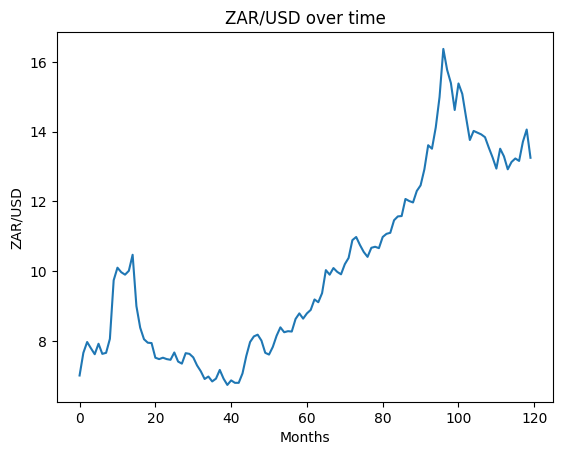

In [ ]:
# Plotting the ZAR/USD exchange rate over time
plt.plot(np.arange(len(df.Y)), df.Y) # Create a line plot for the ZAR/USD values
plt.title("ZAR/USD over time") # Title of the plot
plt.xlabel("Months") # Label for the x-axis
plt.ylabel("ZAR/USD") # Label for the y-axis
plt.show() # Display the plot

Let's create a plot to visualise the value of exports from South Africa, measured in millions of ZAR. This helps show us any trends in export activity and economic performance over the same period.

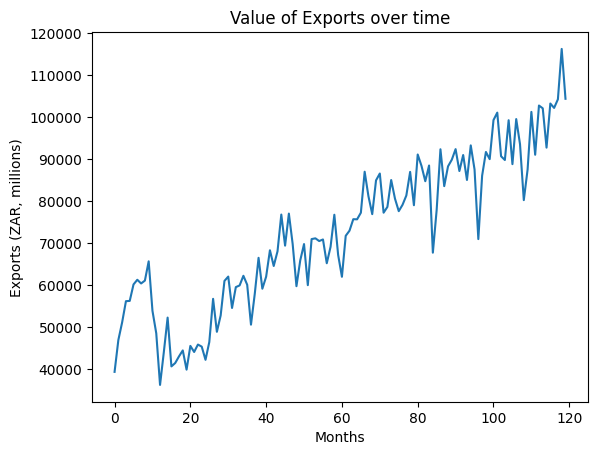

In [ ]:
# Plotting the value of exports over time
plt.plot(np.arange(len(df.X)), df.X) # Create a line plot for the export values
plt.title("Value of Exports over time") # Title of the plot
plt.xlabel("Months") # Label for the x-axis
plt.ylabel("Exports (ZAR, millions)") # Label for the y-axis
plt.show() # Display the plot

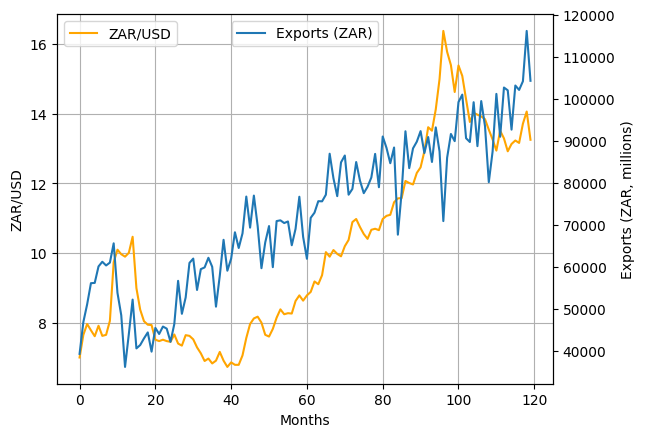

In [ ]:
"""
We'll plot both dependent data series on the same graph.
We'll assign two separate y-axes: one for each series.
We'll display a legend near the top of the plot.
"""

rc('mathtext', default='regular') # Set the default style for math text in plots to regular text
fig = plt.figure() # Create a blank figure object to hold the plots

# Add a subplot to the figure, '111' means 1x1 grid, first subplot
ax = fig.add_subplot(111)

# Plot the ZAR/USD exchange rate data on the primary y-axis using an orange line
ax.plot(np.arange(len(df.Y)), df.Y, '-', label = 'ZAR/USD', color='orange')

# Create a second y-axis (twin of the first) to accommodate another data set on the same x-axis
ax2 = ax.twinx()

# Plot the Value of Exports data on the secondary y-axis
ax2.plot(np.arange(len(df.X)), df.X, '-', label = 'Exports (ZAR)')

# Add legends to distinguish the two lines, with custom locations for clarity
ax.legend(loc=2)  # Legend for the primary axis (ZAR/USD) at the top left (location 2)
ax2.legend(loc=9)  # Legend for the secondary axis (Exports) at the top centre (location 9)

ax.grid() # Enable grid for better readability of the plot

# Set the labels for the x-axis and both y-axes to indicate the data being plotted
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")

plt.show() # Display the plot

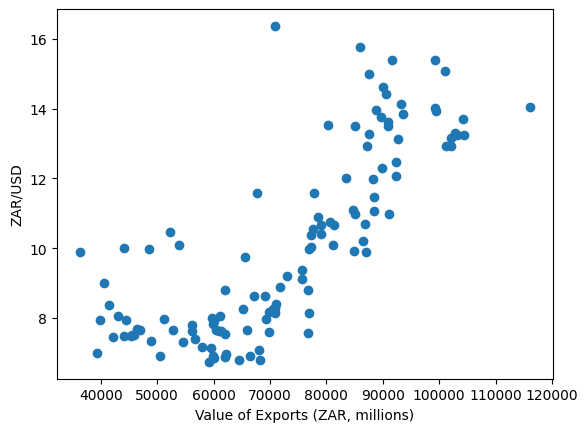

In [ ]:
plt.scatter(df['X'], df['Y'])
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

From the plot above, we can see that there possibly exists a linear relationship between the two variables: Value of Exports and ZAR/USD, due to the linear trend of the data.

We would like to be able to fit a line to this data such that we can make predictions of Y for new values of X. We would like to calculate values for the slope, m
, and the y-intercept, c, such that the line represented by y=mx+c lies as close as possible to the points shown in the scatter plot above.

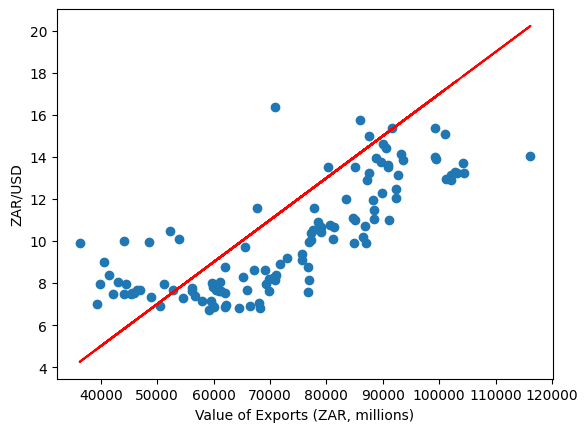

In [ ]:
# Define a function to generate predicted values of 'Y' (ZAR/USD) for a given list of 'X' (Value of Exports),
# based on linear equation parameters 'm' (slope) and 'c' (intercept)

def gen_y(x_list, m, c):
    y_gen = []
    for x_i in x_list:  # Loop through each value in the list of 'X'
        y_i = m*x_i + c # Calculate the corresponding 'Y' value using the linear equation
        y_gen.append(y_i) # Append the calculated 'Y' value to the list

    return(y_gen) # Return the list of generated 'Y' values

# Generate the predicted 'Y' values using the 'gen_y' function with specified 'm' and 'c' parameters
y_gen = gen_y(df.X, 0.0002, -3)

# Plot the original data and the linear regression line
plt.scatter(df.X, df.Y) # Plot the original data as a scatter plot
plt.plot(df.X, y_gen, color='red') # Plot the generated 'Y' values as a line in red to represent the linear model
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

Let's check the calculated fit of the line by measuring how far the true y-values of each point are from their corresponding y-value on the line.

In [ ]:
errors = np.array(df.Y - y_gen)
np.round(errors, 2)

array([ 2.14,  1.27,  0.74, -0.44, -0.63, -1.11, -1.62, -1.42, -1.15,
       -0.39,  2.32,  3.26,  5.65,  4.2 ,  3.02,  3.87,  3.09,  2.44,
        2.06,  2.96,  1.41,  1.66,  1.35,  1.41,  2.02,  1.38, -0.94,
        0.57,  0.09, -1.57, -1.88, -0.61, -1.77, -2.07, -2.46, -2.18,
       -0.2 , -1.42, -3.38, -2.09, -2.53, -3.86, -3.11, -3.54, -4.79,
       -2.91, -4.27, -2.78, -0.94, -2.52, -3.34, -1.17, -3.04, -2.84,
       -2.85, -2.89, -1.77, -2.19, -3.56, -1.8 , -0.61, -2.46, -2.4 ,
       -3.03, -2.76, -2.41, -4.49, -3.14, -2.4 , -4.07, -4.11, -2.06,
       -1.83, -3.02, -2.36, -1.97, -2.41, -2.59, -3.69, -2.14, -4.23,
       -3.6 , -2.84, -3.23,  1.03, -0.99, -3.39, -1.7 , -2.68, -2.67,
       -3.01, -1.51, -1.58, -0.49, -1.53,  0.49,  5.18,  1.57,  0.06,
       -0.37, -1.47, -2.13, -0.72, -1.19, -2.83, -0.78, -2.98, -1.86,
        0.5 , -1.24, -4.3 , -1.69, -4.25, -4.49, -2.41, -4.41, -4.27,
       -4.13, -6.18, -4.61])



When looking at the errors, we see that some of our predictions are off by almost R6!

Let's take a look at a distribution of our errors (using a histogram).


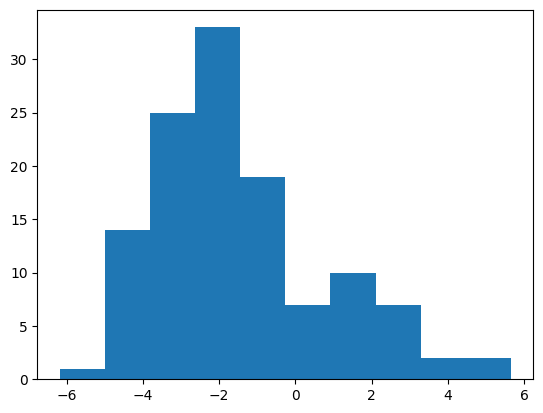

In [ ]:
plt.hist(errors)
plt.show()

In [ ]:
print("Residual sum of squares:", (errors ** 2).sum())

Residual sum of squares: 867.1710481532764


An RSS value of 867 indicates that the model's predictions are significantly deviating from the actual data points. A high RSS value suggests that the simple linear regression model does not capture the underlying pattern effectively, leading to inaccurate predictions and implying a poor fit between the model and the observed data.

### Least squares regression

Least squares is a method used in regression analysis to find the best-fitting straight line through a set of data points. It does this by minimising the sum of the squares of the residuals between the observed values and those predicted by the line

In [ ]:
# Extract values of X and Y as numpy arrays for mathematical operations
X = df.X.values
Y = df.Y.values

# Calculate mean of X and Y
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate the slope (m) of the regression line using the least squares method
m = sum((X - x_bar) * (Y - y_bar)) / sum((X - x_bar) ** 2)

# Calculate the intercept (c) of the regression line
c = y_bar - m * x_bar

# Output the calculated slope and intercept
print("Slope = ", m)
print("Intercept = ", c)

Slope =  0.000113507257658843
Intercept =  1.8448114670426463


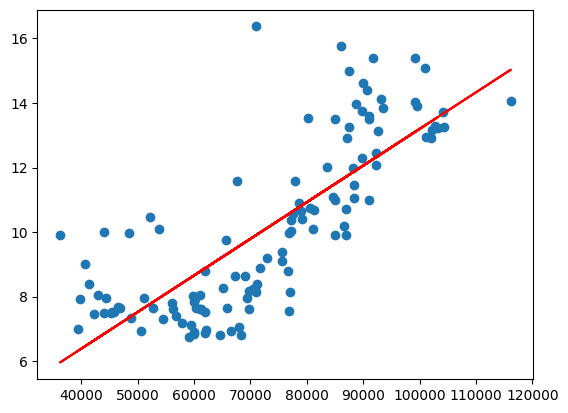

In [ ]:
# use the function we created earlier to generate y-values for a given list of x-values, using the calculated slope and intercept
def gen_y(x_list, m, c):
    y_gen = []
    for x_i in x_list:
        y_i = m*x_i + c
        y_gen.append(y_i)

    return(y_gen)

# Generate y-values for the given x-values in the dataset based on the calculated slope and intercept
y_gen = m * df.X + c

# Plot the original data points as a scatter plot
plt.scatter(df.X, df.Y)

# Plot the regression line using the generated y-values
plt.plot(df.X, y_gen, color='red')

plt.show()

In [ ]:
errors2 = np.array(y_gen - df.Y) # Calculate the residuals by subtracting the observed Y values from the generated Y values
print(np.round(errors2, 2)) # Print the residuals, rounded to 2 decimal places

[-0.7  -0.49 -0.32  0.43  0.61  0.75  1.17  1.04  0.72 -0.44 -2.14 -2.62
 -3.94 -3.16 -2.69 -2.54 -1.83 -1.32 -1.06 -1.57 -0.51 -0.63 -0.47 -0.49
 -0.82 -0.55  0.87  0.04  0.19  1.14  1.36  0.74  1.47  1.74  1.93  1.82
  0.67  1.25  2.47  1.82  2.01  2.8   2.37  2.5   2.99  1.75  2.46  1.58
  0.62  1.66  2.15  0.82  1.75  1.53  1.59  1.61  0.98  1.06  1.77  0.83
  0.09  1.1   0.93  1.32  1.06  0.58  1.82  0.96  0.59  1.57  1.47  0.23
 -0.12  0.51  0.24  0.1   0.41  0.4   1.01  0.15  1.2   0.8   0.36  0.42
 -2.04 -0.9   0.25 -0.68 -0.11 -0.26 -0.13 -1.19 -1.44 -2.02 -1.69 -3.21
 -6.47 -4.16 -3.14 -2.56 -2.27 -1.77 -2.27 -1.73 -0.91 -2.05 -0.78 -1.38
 -2.59 -1.49  0.39 -1.33  0.21  0.51 -0.76  0.33  0.28 -0.04  0.97  0.44]


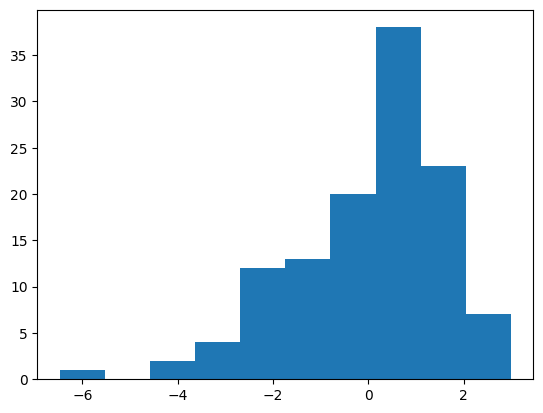

In [ ]:
plt.hist(errors2)
plt.show()

In [ ]:
# Calculate the residual sum of squares (RSS) by squaring the residuals and summing them up
print("Residual sum of squares:", (errors2 ** 2).sum())

Residual sum of squares: 321.45716655257655


In [ ]:
# Round off the sum of residuals to 11 decimal places to check for numerical stability or precision issues
np.round(errors2.sum(),11)

-0.0

## Linear regression - sci-kit learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialise the LinearRegression model
lm = LinearRegression()

In [ ]:
lm.fit

<bound method LinearRegression.fit of LinearRegression()>

In [ ]:
# Reshape the X array to a 2D array as required by scikit-learn, converting from pandas Series to numpy array if necessary
X = df.X.values[:, np.newaxis]

In [ ]:
# Fit the linear model to the data
lm.fit(X, df.Y)

LinearRegression()

In [ ]:
# Extract the slope (coefficient) and intercept from the fitted model
m = lm.coef_[0]
c = lm.intercept_

In [ ]:
# Print the slope and intercept
print("Slope:\t\t", m)
print("Intercept:\t", c)

Slope:		 0.00011350725765884299
Intercept:	 1.844811467042648


In [ ]:
# Use the fitted model to generate Y values from the X values
gen_y = lm.predict(X)

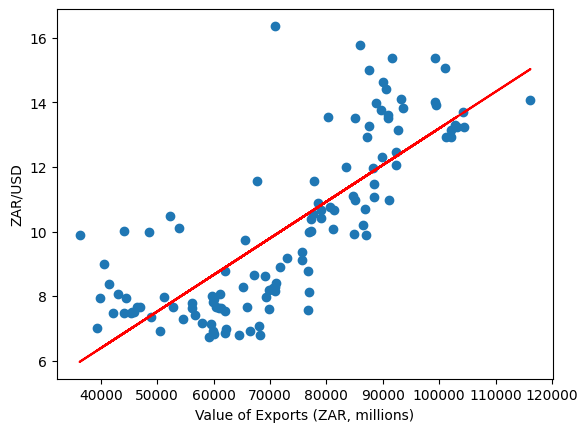

In [ ]:
# plot the results
plt.scatter(X, df.Y)  # Plot the original data
plt.plot(X, gen_y, color='red')  # Plot the line connecting the generated y-values

# Label the axes
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")

plt.show()

In [ ]:
# Calculate and print the residual sum of squares (RSS) for the fitted model
print("Residual sum of squares:", ((gen_y - df.Y) ** 2).sum())

Residual sum of squares: 321.4571665525765


In [ ]:
# Import metrics from scikit-learn
from sklearn import metrics

In [ ]:
# Calculate and print the mean squared error (MSE) between the observed and predicted Y values
print('MSE:', metrics.mean_squared_error(df.Y, gen_y))

MSE: 2.6788097212714708


In [ ]:
# Calculate and print the RSS by multiplying the MSE by the number of observations
print("Residual sum of squares:", metrics.mean_squared_error(df.Y, gen_y)*len(X))

Residual sum of squares: 321.4571665525765


In [ ]:
# Calculate and print the R-squared value, a measure of how well the observed values are replicated by the model
print('R_squared:', metrics.r2_score(df.Y, gen_y))

R_squared: 0.6158417476896207


## Model Performance

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_1.csv', index_col=0)
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


In [ ]:
# Split the dataset into the response, y, and features, X
y = df['ZAR/USD']
X = df.drop('ZAR/USD', axis=1)

In [ ]:
# Call the 'train_test_split' function:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

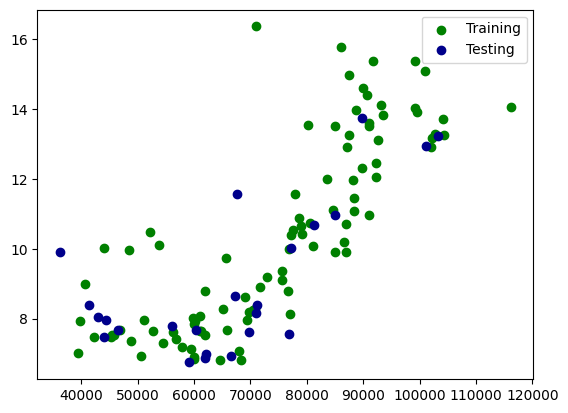

In [ ]:
# Enable's us to see that we have a similar spread of data in each (but far fewer data points in the testing set).
# Plot the splitting results
plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

Below, as we fit the model, we provide it with the training features and their responses. This way, it can learn which data points map to which output, as is required of the model training process.

In [ ]:
# Fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Extract the intercept, or y-cut, of our linear model
a = float(lm.intercept_)

In [ ]:
# Extract the coefficient, or gradient, of our linear model
b = lm.coef_

In [ ]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [0.0001199]
Intercept:	 1.4542630444144802


### Assessing the model on the training data

We can get an idea of what the regression line looks like by overlaying it on a scatter plot of the training data.

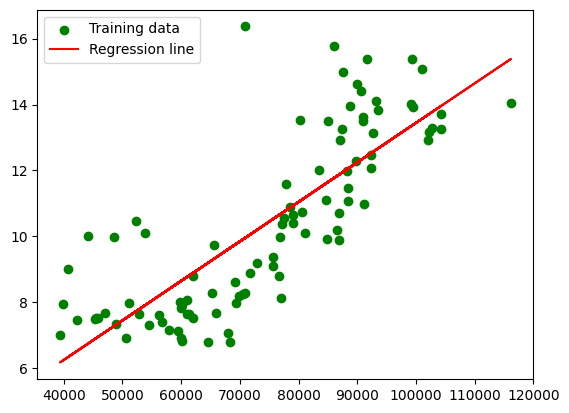

In [ ]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X_train)

# Plot the results
plt.scatter(X_train, y_train, color='green', label='Training data')  # Plot the training data in green
plt.plot(X_train, gen_y, color='red', label='Regression line')  # Plot the line connecting the generated y-values
plt.legend()
plt.show()

In [ ]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 2.6125475375589073
R_squared: 0.6402293095045937


### Assessing the model on the testing (unseen) data

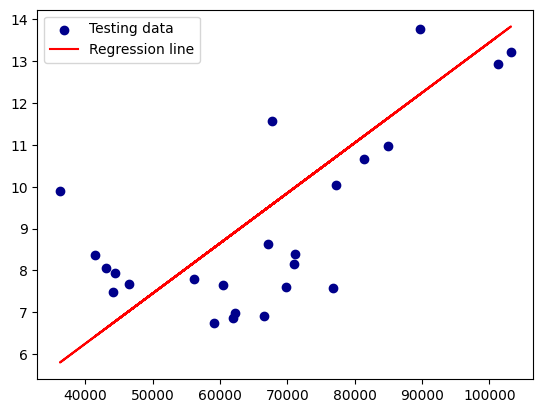

In [ ]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='darkblue', label='Testing data')  # Plot the testing data in blue
plt.plot(X_test, gen_y_test, color='red', label='Regression line')  # Plot the line connecting the generated y-values in red
plt.legend()
plt.show()

In [ ]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 3.038981977599916
R_squared: 0.30031043412578884


### Observation

Mean squared error is higher on the test set than the train set, indicating poor predictive accuracy.

R-squared is lower on the test set, indicating a worse fit on the test set.

These results indicate overfitting